### Tam Sentiment Analysis

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import emoji

In [7]:
!pip install emoji 

In [8]:
fake_train_dataset = pd.read_csv('./data/mal_fake_train.csv')#, encoding='ISO-8859-1')
fake_dev=pd.read_csv('./data/mal_fake_dev.csv')#, encoding='ISO-8859-1')
# Merge the two dataframes
fake_train_dataset = pd.concat([fake_train_dataset, fake_dev])
fake_train_dataset.head(50)

,Unnamed: 0,text,label
0,4438,Sajan sir pedichu poyo,Fake
1,1937,സ്പോൺസർ യുഎസ്,Fake
2,4131,നിങ്ങളൊക്കെ എന്ത് അറിഞ്ഞിട്ടാണ് 🙄 തിരുവാതിര കള...,original
3,456,ഇന്ത്യൻ ഗവണ്മെന്റ് പ്രഖ്യാപിച്ച ഹോമിയോപതി മെഡി...,Fake
4,3943,Good chaina👍👍👍👍,Fake
5,2955,ഇതാണ് വീട് വേവുമ്പോൾ വാഴവെട്ടുന്നു<br>എന്ന്പറയ...,original
6,3642,Kalikkarikal aarum mask ittittillallo,original
7,3511,വക്സിൻ എടുത്ത് എത്ര പേർ മരിച്ചു,Fake
8,525,Ee Veena George ne okke pidichu kinattil idanam,original
9,1196,ഞാൻ ഒരു എസ് എൽ ഇരോഗിയാണ്‌ഒരുപാട്‌ആയുർവ്വേതചികി...,Fake


<Axes: ylabel='text'>

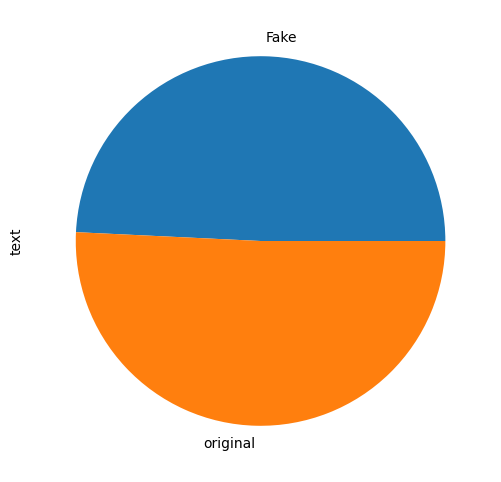

In [9]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
fake_train_dataset.groupby('label')['text'].count().plot.pie(ax=axis)

In [10]:
# Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
def get_score(value):
    if(value == 'original'):
        a=1
    elif(value == 'Fake'):
        a=0
        
    return a

In [11]:
def preprocess_text(text):

  if isinstance(text, str):

    print("Original Text:", text)

    # Remove HTML tags
    text = re.sub('<[^>]*>', ' ', text)
    #print("Text after removing HTML tags:", text)
    # Convert to lowercase
    text =  text.lower()
    #print("Converting to lowercase:", text)
    # regular expression to match URLs
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    #print("Text after removing regular expression to match URLs:", text)

    text = re.sub(r'\d+', ' ', text)
    #print("Text after removing digital:", text)

    # Combine words back into a single string
    preprocessed_text = ''.join(text)
    #print("Final pre-processed text:", preprocessed_text)
    return preprocessed_text
# Apply preprocessing to the 'text' column of the dataset
fake_train_dataset['text'] = fake_train_dataset['text'].apply(preprocess_text)
# Save cleaned dataset
fake_train_dataset.head(55)

Original Text: Sajan sir pedichu poyo
Original Text: സ്പോൺസർ യുഎസ്
Original Text: നിങ്ങളൊക്കെ എന്ത് അറിഞ്ഞിട്ടാണ് 🙄 തിരുവാതിര കളി തുടങ്ങും മുമ്പ് കൈക്കും കാലിനും Sanitiser ആക്കിയിട്ടാണ് കളിക്കുന്നത് 😾
Original Text: ഇന്ത്യൻ ഗവണ്മെന്റ് പ്രഖ്യാപിച്ച ഹോമിയോപതി മെഡിസിൻ Arsenic Alba 30 എല്ലാവരും കഴിക്കു, preventive ആണ്, also ഇമ്മ്യൂണിറ്റി booster.
Original Text: Good chaina👍👍👍👍
Original Text: ഇതാണ് വീട് വേവുമ്പോൾ വാഴവെട്ടുന്നു<br>എന്ന്പറയുന്നപരിപാടിനാട്ടിൽഅനീതിയുംഅക്രമവുംകൊടികുത്തിവാഴുന്നു<br>ഗുണ്ടകളെ പേടിച്ച് നാട്ടിൽ ഇറങ്ങിനടക്കാ<br> ൻപറ്റാത്തഅവസ്ഥ
Original Text: Kalikkarikal aarum mask ittittillallo
Original Text: വക്സിൻ  എടുത്ത്  എത്ര  പേർ മരിച്ചു
Original Text: Ee Veena George ne okke pidichu kinattil idanam
Original Text: ഞാൻ ഒരു എസ് എൽ ഇരോഗിയാണ്‌ഒരുപാട്‌ആയുർവ്വേതചികിൽസനടത്തിമടുത്തു.രോഗം എന്താണെന്ന് ആർക്കും മനസ്സിലായില്ല അവസാനം ലങ്‌സിനെഭാധിച്ചു.നീര് കുത്തി യെടുത്ത്‌പരിശോധിച്ചു.അതിലൂംരോഗംഎന്താണെന്നറിഞ്ഞല്ല അവസാനംഒരുറുമറ്റോളജിസ്റ്റിനെകാണിച്ചുഅദ്ദേഹത്തോട്‌രോഗംഎന്താണെന്നറിയാതെഞാൻമരുന്ന്‌കഴ

,Unnamed: 0,text,label
0,4438,sajan sir pedichu poyo,Fake
1,1937,സ്പോൺസർ യുഎസ്,Fake
2,4131,നിങ്ങളൊക്കെ എന്ത് അറിഞ്ഞിട്ടാണ് 🙄 തിരുവാതിര കള...,original
3,456,ഇന്ത്യൻ ഗവണ്മെന്റ് പ്രഖ്യാപിച്ച ഹോമിയോപതി മെഡി...,Fake
4,3943,good chaina👍👍👍👍,Fake
5,2955,ഇതാണ് വീട് വേവുമ്പോൾ വാഴവെട്ടുന്നു എന്ന്പറയുന്...,original
6,3642,kalikkarikal aarum mask ittittillallo,original
7,3511,വക്സിൻ എടുത്ത് എത്ര പേർ മരിച്ചു,Fake
8,525,ee veena george ne okke pidichu kinattil idanam,original
9,1196,ഞാൻ ഒരു എസ് എൽ ഇരോഗിയാണ്‌ഒരുപാട്‌ആയുർവ്വേതചികി...,Fake


In [12]:
def replace_emoji(text):
    return emoji.demojize(text, delimiters=('', ''))
# Apply the function to the column containing emoji
fake_train_dataset['text'] = fake_train_dataset['text'].apply(replace_emoji)

In [14]:
def remove_punctuation(text):
    # Define the punctuation characters to remove
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    # Remove the punctuation characters from the text
    for punctuation in punctuations:
        text = text.replace(punctuation, "")
    return text
# Apply the function to the column containing emoji
fake_train_dataset['text'] = fake_train_dataset['text'].apply(remove_punctuation)

In [15]:
fake_train_dataset.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [16]:
fake_train_dataset.duplicated().sum()

0

In [17]:
fake_train_dataset.drop_duplicates(inplace = True)

In [18]:
 fake_train_dataset.duplicated().sum()

0

In [19]:
# Save cleaned train_dataset to CSV file
fake_train_dataset.to_csv('./data/clean_mal_fake_train.csv', index=False)

In [138]:
#Load sen_tam_test_without_labels data
mal_fake_test_without_labels = pd.read_csv('./data/mal_fake_test_without_labels.csv')#, encoding='ISO-8859-1')
# Preprocess sen_tam_test_without_labels data
mal_fake_test_without_labels['text'] = mal_fake_test_without_labels['text'].apply(preprocess_text)
mal_fake_test_without_labels['text'] = mal_fake_test_without_labels['text'].apply(replace_emoji)
mal_fake_test_without_labels['text'] = mal_fake_test_without_labels['text'].apply(remove_punctuation)

Original Text: இது புதுவகை கொள்ளை கூட்டம்
Text after removing HTML tags: இது புதுவகை கொள்ளை கூட்டம்
Converting to lowercase: இது புதுவகை கொள்ளை கூட்டம்
Text after removing regular expression to match URLs: இது புதுவகை கொள்ளை கூட்டம்
Text after removing digital: இது புதுவகை கொள்ளை கூட்டம்
Final pre-processed text: இது புதுவகை கொள்ளை கூட்டம்
Original Text: சுட்டுக்கொல்ல வேண்டும் அல்லது குண்டர் சட்டத்தில் கைது செய்ய வேண்டும்
Text after removing HTML tags: சுட்டுக்கொல்ல வேண்டும் அல்லது குண்டர் சட்டத்தில் கைது செய்ய வேண்டும்
Converting to lowercase: சுட்டுக்கொல்ல வேண்டும் அல்லது குண்டர் சட்டத்தில் கைது செய்ய வேண்டும்
Text after removing regular expression to match URLs: சுட்டுக்கொல்ல வேண்டும் அல்லது குண்டர் சட்டத்தில் கைது செய்ய வேண்டும்
Text after removing digital: சுட்டுக்கொல்ல வேண்டும் அல்லது குண்டர் சட்டத்தில் கைது செய்ய வேண்டும்
Final pre-processed text: சுட்டுக்கொல்ல வேண்டும் அல்லது குண்டர் சட்டத்தில் கைது செய்ய வேண்டும்
Original Text: இந்த திருநங்கைகள் பொதுமக்களுக்கு பொது இடங்களில் ப

In [ ]:
mal_fake_test_without_labels.isnull().sum()

In [ ]:
mal_fake_test_without_labels.duplicated().sum()

In [ ]:
mal_fake_test_without_labels.drop_duplicates(inplace = True)

In [ ]:
mal_fake_test_without_labels.duplicated().sum()

In [139]:
# Save cleaned train_dataset to CSV file
mal_fake_test_without_labels.to_csv('./data/sen_tam_test_without_labels.csv', index=False)

In [141]:
#sen_tam_test_without_labels.head(10)

### Kannada Language Preprocessing

In [143]:
# Merge Dev and Train Data
tulu_train = pd.read_csv('./data/tulu-train.csv')#, encoding='ISO-8859-1')
tulu_dev=pd.read_csv('./data/tulu-dev.csv')#, encoding='ISO-8859-1')
# Merge the two dataframes
senti_tulu_train_dataset = pd.concat([tulu_train, tulu_dev])

In [144]:
senti_tulu_train_dataset.head()

,Text,Annotations
0,Devdas kapikad no1,Positive
1,ajji eer super,Positive
2,Bega 2 nd part padle,Neutral
3,ynkul Kudla dakul yepala Ideal Icecream g 10 o...,Neutral
4,Tulu panda enku masth ista i love tulu tulunadu,Positive


<Axes: ylabel='Text'>

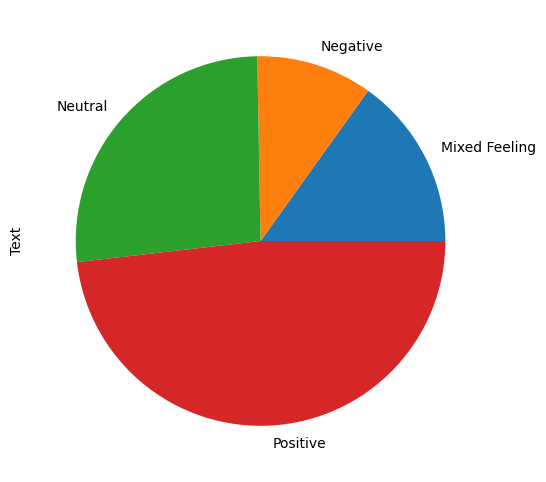

In [145]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
senti_tulu_train_dataset.groupby('Annotations')['Text'].count().plot.pie(ax=axis)

In [146]:
# Preprocess sen_tam_test_without_labels data
senti_tulu_train_dataset['Text'] = senti_tulu_train_dataset['Text'].apply(preprocess_text)
senti_tulu_train_dataset['Text'] = senti_tulu_train_dataset['Text'].apply(replace_emoji)
senti_tulu_train_dataset['Text'] = senti_tulu_train_dataset['Text'].apply(remove_punctuation)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Text after removing regular expression to match URLs: dumbu ora consent batt potundu
Text after removing digital: dumbu ora consent batt potundu
Final pre-processed text: dumbu ora consent batt potundu
Original Text: ಸೂಪರ್ ಮರ್ರೆ 😁😁😁😁😁
Text after removing HTML tags: ಸೂಪರ್ ಮರ್ರೆ 😁😁😁😁😁
Converting to lowercase: ಸೂಪರ್ ಮರ್ರೆ 😁😁😁😁😁
Text after removing regular expression to match URLs: ಸೂಪರ್ ಮರ್ರೆ 😁😁😁😁😁
Text after removing digital: ಸೂಪರ್ ಮರ್ರೆ 😁😁😁😁😁
Final pre-processed text: ಸೂಪರ್ ಮರ್ರೆ 😁😁😁😁😁
Original Text: This story is based on true events in Tumkuru which we read months back in our Daily Newspapers, good job by everyone..
Baari shok aatnd
Text after removing HTML tags: This story is based on true events in Tumkuru which we read months back in our Daily Newspapers, good job by everyone..
Baari shok aatnd
Converting to lowercase: this story is based on true events in tumkuru which we read months back in our daily newspapers, good job by everyone..
baari shok aatnd
Text after removing regular

In [147]:
# Save cleaned train_dataset to CSV file
senti_tulu_train_dataset.to_csv('./cleaned_data/tulu-train.csv', index=False)

In [148]:
#Load sen_tam_test_without_labels data
sen_tulu_test_without_label = pd.read_csv('./data/sen_tulu_test_without_label .csv')#, encoding='ISO-8859-1')
# Preprocess sen_tam_test_without_labels data
sen_tulu_test_without_label['Text'] = sen_tulu_test_without_label['Text'].apply(preprocess_text)
sen_tulu_test_without_label['Text'] = sen_tulu_test_without_label['Text'].apply(replace_emoji)
sen_tulu_test_without_label['Text'] = sen_tulu_test_without_label['Text'].apply(remove_punctuation)

Original Text: Suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Text after removing HTML tags: Suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Converting to lowercase: suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Text after removing regular expression to match URLs: suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Text after removing digital: suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Final pre-processed text: suraaj shetr eer manjeswaradaara wow yanla alpadaale sir er yenk masth esta sir
Original Text: Bari Porluda Comedy Show
Text after removing HTML tags: Bari Porluda Comedy Show
Converting to lowercase: bari porluda comedy show
Text after removing regular expression to match URLs: bari porluda comedy show
Text after removing digital: bari porluda comedy show
Final pre-processed text: bari porluda comedy show
Original T

In [149]:
# Save cleaned train_dataset to CSV file
sen_tulu_test_without_label.to_csv('./cleaned_data/sen_tulu_test_without_label .csv', index=False)